# Analisis general: Esculturas publicas de Medellín

### Importar librerias

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1D1B1D', '#3B393B', '#605A39', '#7A6E45', '#9F8A6A', '#C6A078', '#B65022', '#D47138', '#F2E3C6', '#F5E1B0', '#F4F4F4', '#E0E0E0', '#2F2B2F', '#D9C6AD', '#987E5A']
sns.set_palette(sns.color_palette(colors))

import folium
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings('ignore')

/Users/laasanchezgi/Documents/laasanchezgi/pm/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Importar funciones especializadas

In [2]:
%run '../utils/funciones.ipynb'

### Importar datos

In [3]:
df = pd.read_csv('../data/esculturas-publicas-medellin.csv')
df.tail()

,id,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
165,166,10,la candelaria,jose maria bravo marquez,avenida la playa,busto,NaN,janeth reyes rivera,"6,2484689","-75,5612659"
166,167,10,la candelaria,blanca isaza jaramillo meza,avenida la playa,busto,2006.0,janeth reyes rivera,"6,2484689","-75,5612659"
167,168,10,la candelaria,arbol de la vida - boston,calle 52 con carrera 36,escultura,2012.0,leobardo perez jimenez,"6,2474261","-75,5576255"
168,169,10,la candelaria,general jose maria cordova,carrera 38 con calle 54,escultura,1957.0,marco tobon mejia,"6,2481596","-75,5577608"
169,170,10,la candelaria,carlos castro saavedra,carrera 38 con calle 54,busto,1989.0,oscar rojas,"6,2483950","-75,5573788"


In [4]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 170 non-null    int64  
 1   codigo-area        170 non-null    int64  
 2   area               170 non-null    object 
 3   name               170 non-null    object 
 4   general-direction  170 non-null    object 
 5   type               170 non-null    object 
 6   year               156 non-null    float64
 7   author             170 non-null    object 
 8   latitude           170 non-null    object 
 9   longitude          170 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 13.4+ KB


## Limpieza

In [5]:
# Eliminación de la columna 'id' que no aporta información relevante
df = df.drop(columns=['id'])
# Estandarización de los formatos de las columnas
df['latitude'] = df['latitude'].apply(lambda x: x.replace(',', '.')).astype(float)
df['longitude'] = df['longitude'].apply(lambda x: x.replace(',', '.')).astype(float)
df.head()

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
0,3,manrique,carlos gardel,carrera 45 con calle 73,escultura,1968.0,alfonso goez,6.269014,-75.554733
1,3,manrique,jorge eliecer gaitan ayala,carrera 37 con calle 69,escultura,2004.0,rodolfo montoya,6.265313,-75.548335
2,4,aranjuez,talentos en libertad,carrera 48 con calle 93,escultura,2003.0,luz maria piedrahita,6.285199,-75.556308
3,4,aranjuez,antonio nariño,carrera 50 con calle 90,escultura,1962.0,alfonso goez,6.282458,-75.561160
4,4,aranjuez,cristo,carrera 50 con calle 90,escultura,1983.0,josue giraldo,6.282358,-75.561155


In [6]:
generar_reporte_nulos(df)

Registros nulos por columna (NaN):
year    14
dtype: int64
---------------------------------


In [7]:
# Proporción de nulos en el dataset (%)
round(14/len(df)*100, 2)

8.24

Se tienen 14 esculturas en Medellín que no registran el año de creación. Puede que por el tiempo se haya borrado su año de creación, es decir, ya no sea legible, o desde su instalación no se hizo el respectivo registro.

Representan aproximadamente el 8% del dataset.

### ¿Cuales son esas esculturas que no registra su año?

In [8]:
df_null = df[df['year'].isnull()].sort_values(by='author')
df_null

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
25,12,la america,el silleterito,calle 46 con carrera 85,escultura,NaN,autor desconocido,6.255953,-75.601386
44,90,santa elena,palomas,parque principal corregimiento de santa elena,escultura,NaN,autor desconocido,6.209949,-75.498063
66,10,la candelaria,benito juarez,calle 37 con carrera 43a,busto,NaN,autor desconocido,6.237018,-75.569743
83,10,la candelaria,replica locomotora,calle 42 con carrera 52,escultura,NaN,autor desconocido,6.244717,-75.572889
124,10,la candelaria,pedro jose berrio,carrera 52 con calle 52,busto,NaN,autor desconocido,6.251460,-75.567700
129,10,la candelaria,san juan bosco,carrera 45 con calle 57,escultura,NaN,autor desconocido,6.253359,-75.560468
71,10,la candelaria,juan del corral - estacion prado,carrera 52 con calle 58,busto,NaN,bernardo vieco,6.256361,-75.566214
65,10,la candelaria,torre roja,calle 31 con carrera 42b,escultura abstracta,NaN,eduardo ramirez villamizar,6.231568,-75.568381
72,10,la candelaria,busto gilberto echeverry,calle 42 con carrera 52,busto,NaN,jairo cano,6.242539,-75.574938
74,10,la candelaria,busto guillerma gaviria,calle 42 con carrera 52,busto,NaN,jairo cano,6.243328,-75.574864


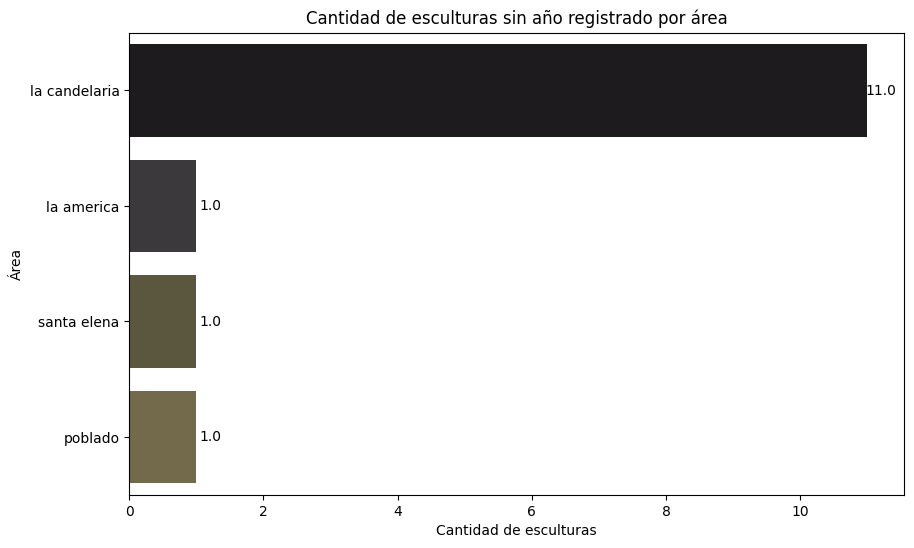

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_null, y='area', order=df_null['area'].value_counts().index, palette=colors)
# Agregar etiquetas a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')
plt.title('Cantidad de esculturas sin año registrado por área')
plt.xlabel('Cantidad de esculturas')
plt.ylabel('Área')
plt.show()

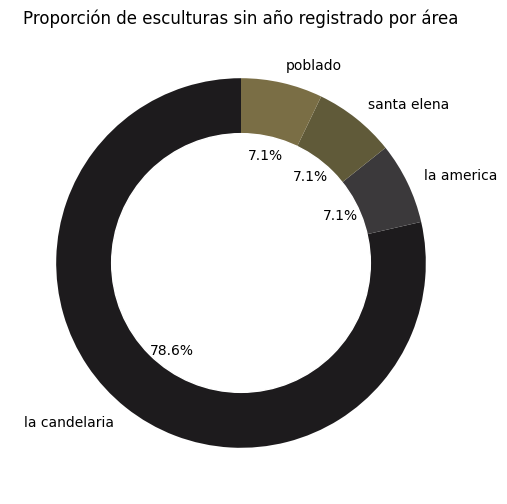

In [10]:
plt.figure(figsize=(10, 6))
circulo = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df_null['area'].value_counts(), labels=df_null['area'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
p = plt.gcf()
p.gca().add_artist(circulo)
plt.title('Proporción de esculturas sin año registrado por área')
plt.show()

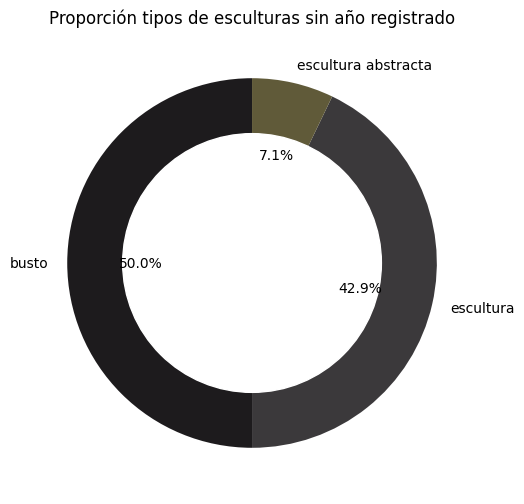

In [11]:
plt.figure(figsize=(10, 6))
circulo = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df_null['type'].value_counts(), labels=df_null['type'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
p = plt.gcf()
p.gca().add_artist(circulo)
plt.title('Proporción tipos de esculturas sin año registrado')
plt.show()

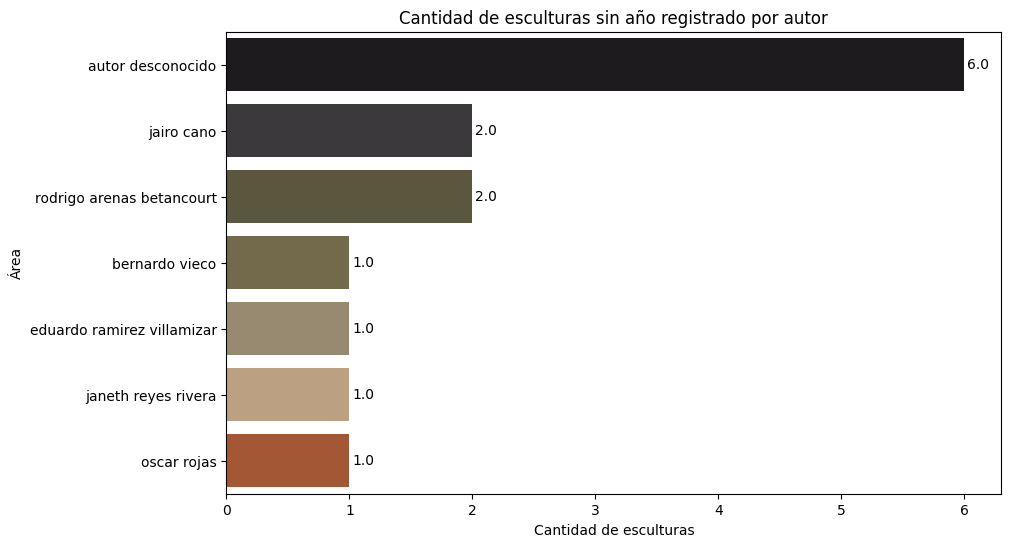

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_null, y='author', order=df_null['author'].value_counts().index, palette=colors)
# Agregar etiquetas a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')
plt.title('Cantidad de esculturas sin año registrado por autor')
plt.xlabel('Cantidad de esculturas')
plt.ylabel('Área')
plt.show()

Se opta por eliminar los registros cuyo año esta nulo

In [13]:
df = df.dropna(subset=['year'])
df.reset_index(drop=True, inplace=True)
df['year'] = df['year'].astype(int)
df.head()

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
0,3,manrique,carlos gardel,carrera 45 con calle 73,escultura,1968,alfonso goez,6.269014,-75.554733
1,3,manrique,jorge eliecer gaitan ayala,carrera 37 con calle 69,escultura,2004,rodolfo montoya,6.265313,-75.548335
2,4,aranjuez,talentos en libertad,carrera 48 con calle 93,escultura,2003,luz maria piedrahita,6.285199,-75.556308
3,4,aranjuez,antonio nariño,carrera 50 con calle 90,escultura,1962,alfonso goez,6.282458,-75.561160
4,4,aranjuez,cristo,carrera 50 con calle 90,escultura,1983,josue giraldo,6.282358,-75.561155


## Exploración

### Analisis univariable

#### Comunas

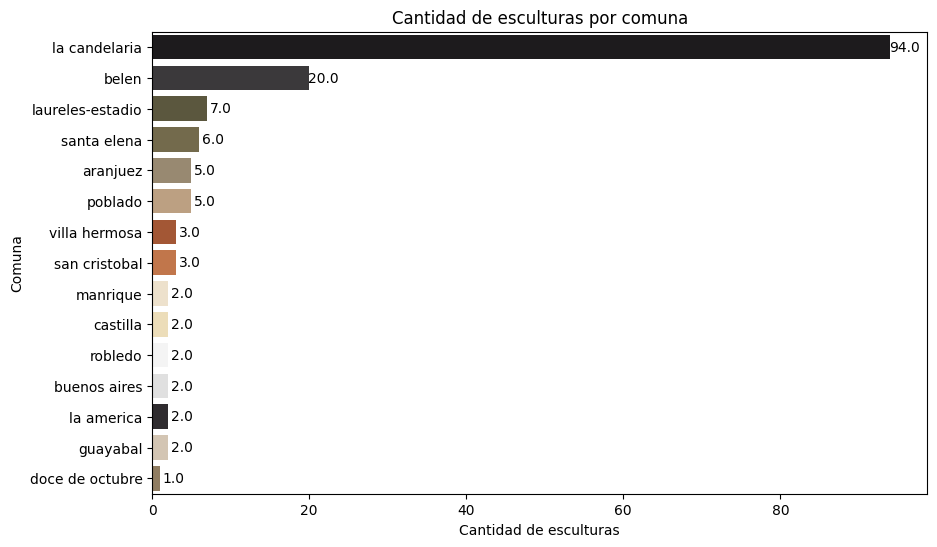

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='area', order=df['area'].value_counts().index, palette=colors)
# Agregar etiquetas a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(10, 0), textcoords='offset points')
plt.title('Cantidad de esculturas por comuna')
plt.xlabel('Cantidad de esculturas')
plt.ylabel('Comuna')
plt.show()

In [15]:
a1 = df.groupby('area').agg({'area': 'count'}).rename(columns={'area': 'cantidad-esculturas'}).sort_values(by='cantidad-esculturas', ascending=False).reset_index()
a1['%'] = (a1['cantidad-esculturas'] / a1['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a1['%-acum'] = (a1['cantidad-esculturas'].cumsum() / a1['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a1

,area,cantidad-esculturas,%,%-acum
0,la candelaria,94,60.3%,60.3%
1,belen,20,12.8%,73.1%
2,laureles-estadio,7,4.5%,77.6%
3,santa elena,6,3.8%,81.4%
4,aranjuez,5,3.2%,84.6%
5,poblado,5,3.2%,87.8%
6,san cristobal,3,1.9%,89.7%
7,villa hermosa,3,1.9%,91.7%
8,buenos aires,2,1.3%,92.9%
9,castilla,2,1.3%,94.2%


El pareto de las esculturas se encuentran en:
* La Candelaria
* Belen
* Laures-Estadio
* Santa Elena

#### Direcciones generales

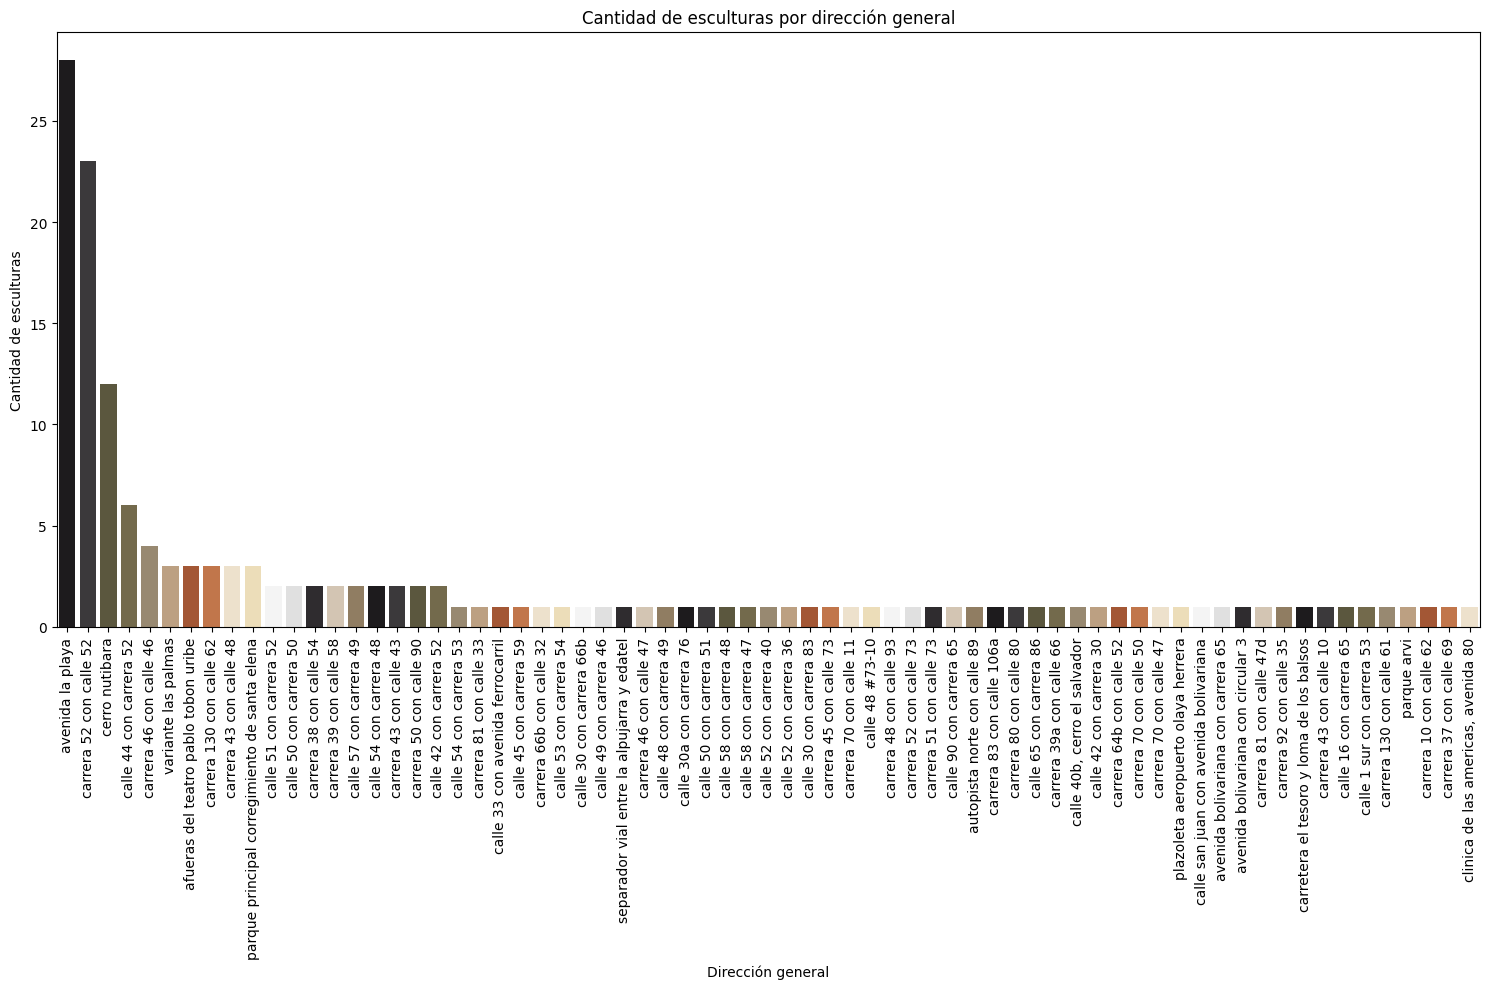

In [16]:
# Gráfico de barras para las frecuencias de categorías, ordenadas en orden descendente
plt.figure(figsize=(15, 10))
ax = sns.countplot(x='general-direction', data=df, order=df['general-direction'].value_counts().index, palette=colors)
plt.title('Cantidad de esculturas por dirección general')
plt.xlabel('Dirección general')
plt.ylabel('Cantidad de esculturas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
a2 = df.groupby('general-direction').agg({'general-direction': 'count'}).rename(columns={'general-direction': 'cantidad-esculturas'}).sort_values(by='cantidad-esculturas', ascending=False).reset_index()
a2['%'] = (a2['cantidad-esculturas'] / a2['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a2['%-acum'] = (a2['cantidad-esculturas'].cumsum() / a2['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a2.head()

,general-direction,cantidad-esculturas,%,%-acum
0,avenida la playa,28,17.9%,17.9%
1,carrera 52 con calle 52,23,14.7%,32.7%
2,cerro nutibara,12,7.7%,40.4%
3,calle 44 con carrera 52,6,3.8%,44.2%
4,carrera 46 con calle 46,4,2.6%,46.8%


El Top 5 de las direcciones generales son:
* Avenida La Playa
* Carrera 52 con calle 52
* Cerro Nutibara
* Calle 44 con carrera 52
* Carrera 46 con calle 46

#### Tipos de esculturas

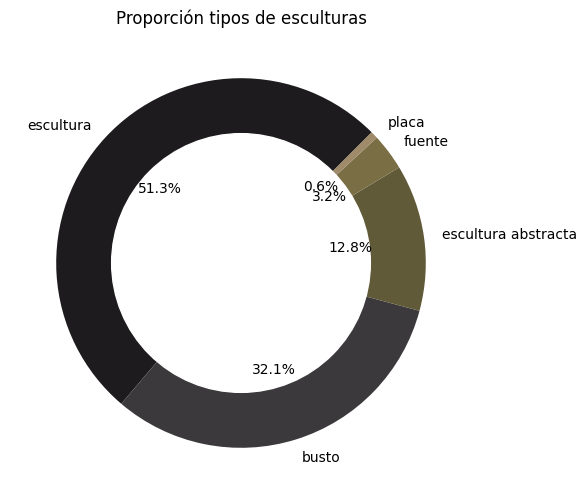

In [18]:
plt.figure(figsize=(10, 6))
circulo = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().index, autopct='%1.1f%%', startangle=45, colors=colors)
p = plt.gcf()
p.gca().add_artist(circulo)
plt.title('Proporción tipos de esculturas')
plt.show()

In [19]:
a3 = df.groupby('type').agg({'type': 'count'}).rename(columns={'type': 'cantidad-esculturas'}).sort_values(by='cantidad-esculturas', ascending=False).reset_index()
a3['%'] = (a3['cantidad-esculturas'] / a3['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a3['%-acum'] = (a3['cantidad-esculturas'].cumsum() / a3['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a3

,type,cantidad-esculturas,%,%-acum
0,escultura,80,51.3%,51.3%
1,busto,50,32.1%,83.3%
2,escultura abstracta,20,12.8%,96.2%
3,fuente,5,3.2%,99.4%
4,placa,1,0.6%,100.0%


#### Escultores

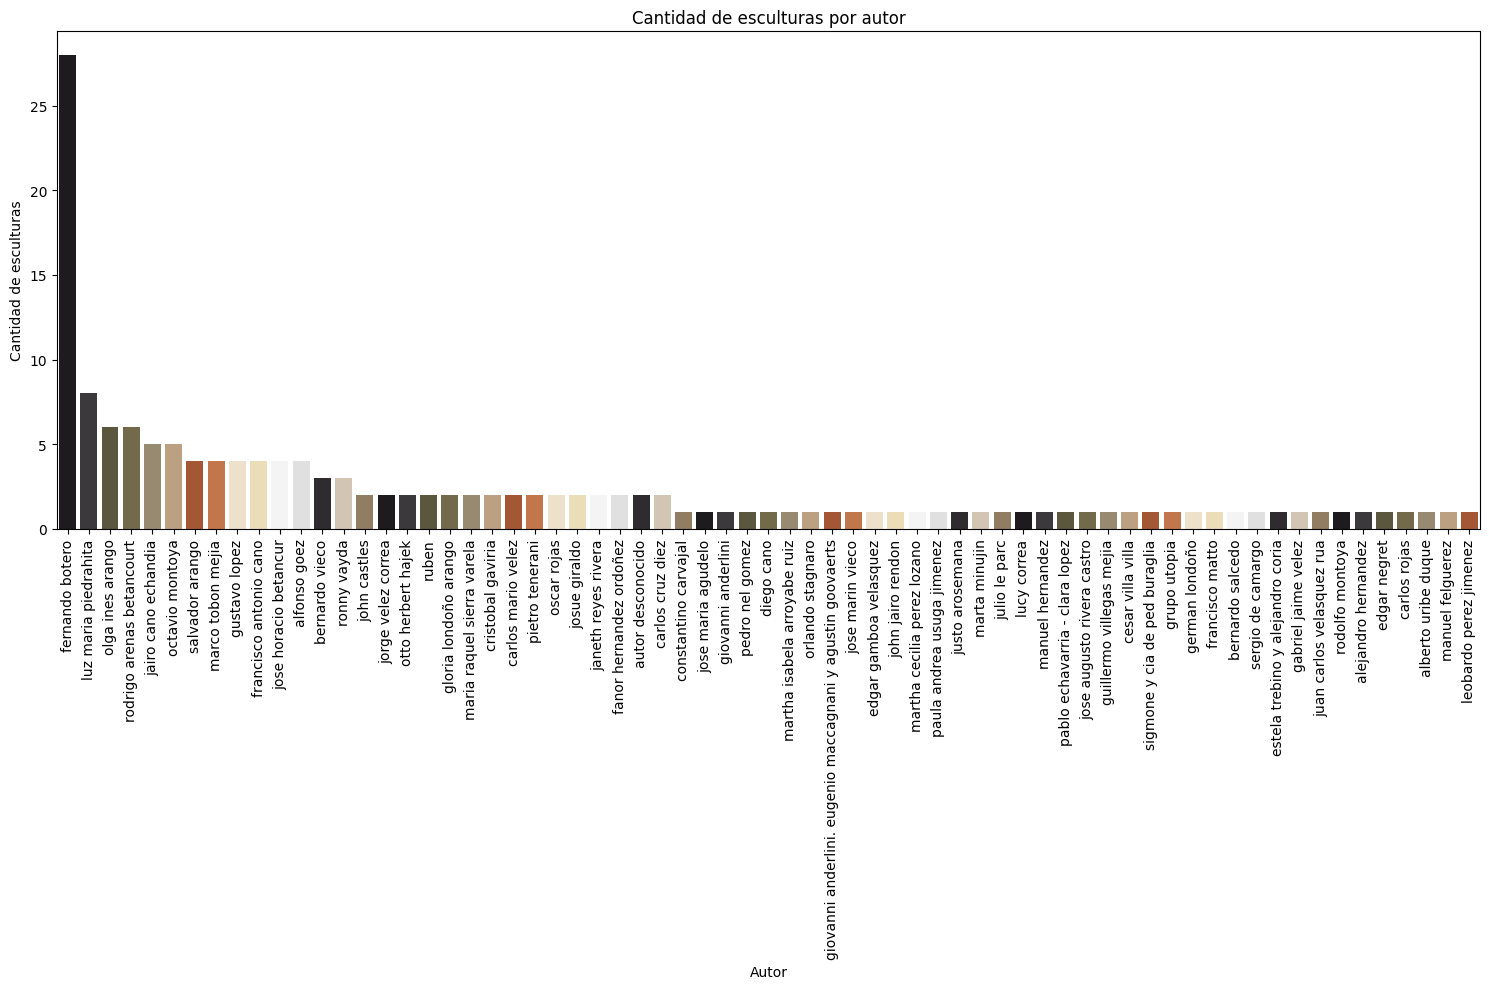

In [20]:
plt.figure(figsize=(15, 10))
sns.countplot(x='author', data=df, order=df['author'].value_counts().index, palette=colors)
plt.title('Cantidad de esculturas por autor')
plt.xlabel('Autor')
plt.ylabel('Cantidad de esculturas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [21]:
a4 = df.groupby('author').agg({'author': 'count'}).rename(columns={'author': 'cantidad-esculturas'}).sort_values(by='cantidad-esculturas', ascending=False).reset_index()
a4['%'] = (a4['cantidad-esculturas'] / a4['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a4['%-acum'] = (a4['cantidad-esculturas'].cumsum() / a4['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a4.head(6)

,author,cantidad-esculturas,%,%-acum
0,fernando botero,28,17.9%,17.9%
1,luz maria piedrahita,8,5.1%,23.1%
2,rodrigo arenas betancourt,6,3.8%,26.9%
3,olga ines arango,6,3.8%,30.8%
4,octavio montoya,5,3.2%,34.0%
5,jairo cano echandia,5,3.2%,37.2%


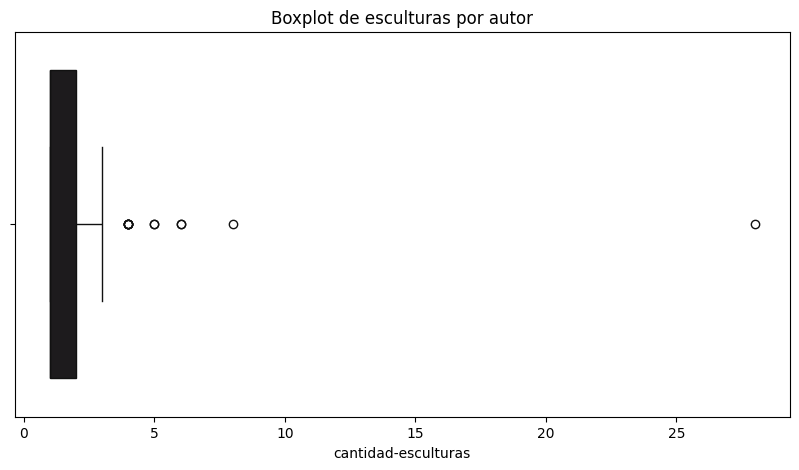

In [22]:
# Gráfico de distribución (histograma y KDE)
plt.figure(figsize=(10, 5))
sns.boxplot(data=a4['cantidad-esculturas'], orient='h', palette=colors)
plt.title('Boxplot de esculturas por autor')
plt.show()

#### Nombres

In [23]:
a5 = df.groupby('name').agg({'name': 'count'}).rename(columns={'name': 'cantidad-esculturas'}).sort_values(by='cantidad-esculturas', ascending=False).reset_index()
a5['%'] = (a5['cantidad-esculturas'] / a5['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a5['%-acum'] = (a5['cantidad-esculturas'].cumsum() / a5['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a5.head(4)

,name,cantidad-esculturas,%,%-acum
0,sin titulo,3,1.9%,1.9%
1,construccion,2,1.3%,3.2%
2,andres escobar,2,1.3%,4.5%
3,atanasio girardot,2,1.3%,5.8%


In [24]:
df[df['name'] == 'sin titulo']

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
52,16,belen,sin titulo,cerro nutibara,escultura abstracta,1983,carlos rojas,6.236206,-75.581944
59,16,belen,sin titulo,cerro nutibara,escultura abstracta,1983,sergio de camargo,6.236968,-75.579813
60,16,belen,sin titulo,cerro nutibara,escultura abstracta,1983,julio le parc,6.237197,-75.580086


In [25]:
df[df['name'] == 'construccion']

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
57,16,belen,construccion,cerro nutibara,escultura abstracta,1983,manuel felguerez,6.236909,-75.580389
58,16,belen,construccion,cerro nutibara,escultura abstracta,1983,john castles,6.236852,-75.579803


In [26]:
df[df['name'] == 'andres escobar']

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
47,16,belen,andres escobar,calle 30 con carrera 66b,busto,2012,carlos mario velez,6.234617,-75.588272
48,16,belen,andres escobar,carrera 66b con calle 32,escultura,2000,alejandro hernandez,6.234572,-75.587346


In [27]:
df[df['name'] == 'atanasio girardot']

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
19,11,laureles-estadio,atanasio girardot,calle 48 #73-10,busto,1954,jose horacio betancur,6.256297,-75.590996
90,10,la candelaria,atanasio girardot,calle 51 con carrera 52,busto,1910,francisco antonio cano,6.251660,-75.569785


#### Año

In [28]:
a6 = df.groupby('year').agg({'year': 'count'}).rename(columns={'year': 'cantidad-esculturas'}).sort_values(by='cantidad-esculturas', ascending=False).reset_index()
a6['%'] = (a6['cantidad-esculturas'] / a6['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a6['%-acum'] = (a6['cantidad-esculturas'].cumsum() / a6['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a6.head(10)

,year,cantidad-esculturas,%,%-acum
0,1997,19,12.2%,12.2%
1,2006,18,11.5%,23.7%
2,2003,11,7.1%,30.8%
3,1983,9,5.8%,36.5%
4,1994,9,5.8%,42.3%
5,1963,8,5.1%,47.4%
6,1992,4,2.6%,50.0%
7,1978,4,2.6%,52.6%
8,1962,4,2.6%,55.1%
9,1954,4,2.6%,57.7%


Estadísticas descriptivas:
count     156.000000
mean     1982.378205
std        27.413993
min      1853.000000
25%      1963.750000
50%      1993.500000
75%      2002.000000
max      2013.000000
Name: year, dtype: float64



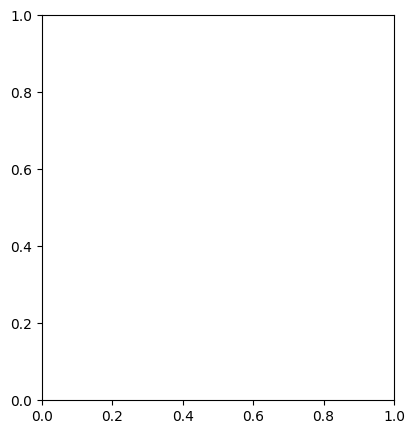

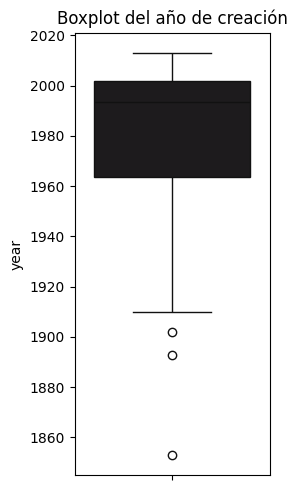

In [29]:
# Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(df['year'].describe())
print()

# Gráfico de distribución (histograma y KDE)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.displot(df['year'], kde=False, bins=20, color=colors[0])
plt.title('Distribución del año de creación')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df['year'], orient='v', palette=colors)
plt.title('Boxplot del año de creación')

plt.tight_layout()
plt.show()
print()

In [30]:
# Conteo de esculturas por año
esculturas_per_year = df['year'].value_counts().sort_index()

# Crear un rango de años desde el minumo hasta el máximo
min_year = esculturas_per_year.index.min()
max_year = esculturas_per_year.index.max()
years = pd.Series(0, index=range(min_year, max_year + 1))

# Combinar las cuentas con todos los años
esculturas_completas = years.add(esculturas_per_year, fill_value=0).astype(int).reset_index()
esculturas_completas.columns = ['year', 'cantidad-esculturas']

esculturas_completas.head()

,year,cantidad-esculturas
0,1853,1
1,1854,0
2,1855,0
3,1856,0
4,1857,0


#### Latitud

#### Longitud

### Analisis bivariado

#### Tipos de esculturas por comunas

In [31]:
a6 = df.groupby(['area','type']).size().unstack()
a6 = a6.fillna(0)
a6 = a6.sort_values(by='escultura', ascending=False)
a6

type,busto,escultura,escultura abstracta,fuente,placa
area,,,,,
la candelaria,42.0,45.0,2.0,4.0,1.0
santa elena,0.0,6.0,0.0,0.0,0.0
belen,4.0,5.0,10.0,1.0,0.0
poblado,0.0,5.0,0.0,0.0,0.0
aranjuez,0.0,4.0,1.0,0.0,0.0
san cristobal,0.0,3.0,0.0,0.0,0.0
castilla,0.0,2.0,0.0,0.0,0.0
laureles-estadio,2.0,2.0,3.0,0.0,0.0
manrique,0.0,2.0,0.0,0.0,0.0


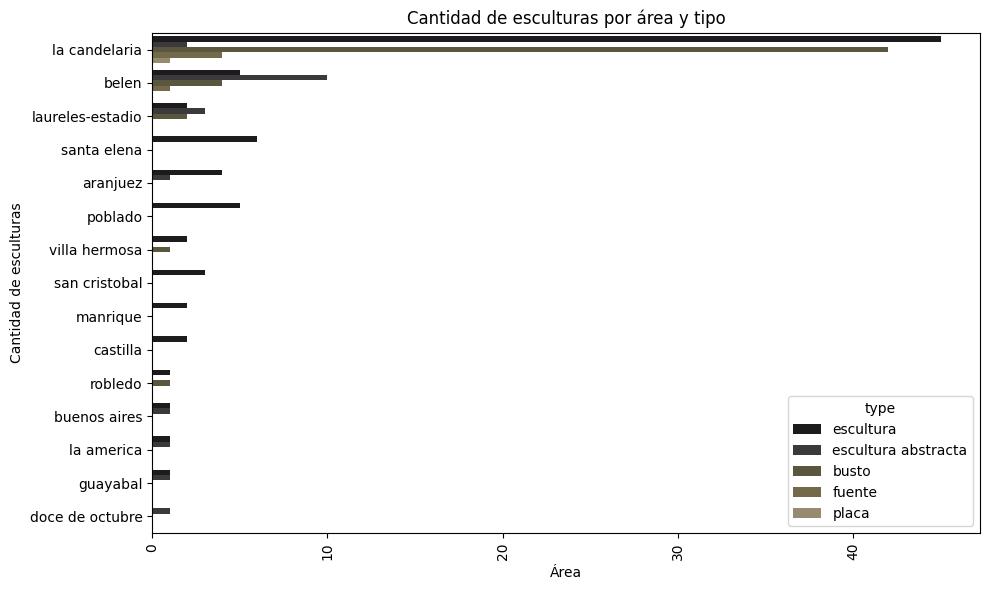

In [32]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='area', hue='type' ,order=df['area'].value_counts().index, palette=colors)
plt.title('Cantidad de esculturas por área y tipo')
plt.xlabel('Área')
plt.ylabel('Cantidad de esculturas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Esculturas en el tiempo y comunas

In [37]:
a6 = df.groupby(['area','year']).agg({'year': 'count'}).rename(columns={'year': 'cantidad-esculturas'}).sort_values(by='year', ascending=True).reset_index()
a6.head()

,area,year,cantidad-esculturas
0,la candelaria,1853,1
1,la candelaria,1893,1
2,la candelaria,1902,1
3,la candelaria,1910,1
4,buenos aires,1917,1


In [40]:
import pandas as pd

def contar_esculturas_per_year(df):
    # Conteo de esculturas por año
    esculturas_per_year = df['year'].value_counts().sort_index()

    # Crear un rango de años desde el mínimo hasta el máximo
    min_year = esculturas_per_year.index.min()
    max_year = esculturas_per_year.index.max()
    years = pd.Series(0, index=range(min_year, max_year + 1))

    # Combinar las cuentas con todos los años
    esculturas_completas = years.add(esculturas_per_year, fill_value=0).astype(int).reset_index()
    esculturas_completas.columns = ['year', 'cantidad-esculturas']
    
    return esculturas_completas

In [41]:
# Conteo de esculturas por año
esculturas_per_year = df['year'].value_counts().sort_index()

# Crear un rango de años desde el minumo hasta el máximo
min_year = esculturas_per_year.index.min()
max_year = esculturas_per_year.index.max()
years = pd.Series(0, index=range(min_year, max_year + 1))

# Combinar las cuentas con todos los años
esculturas_completas = years.add(esculturas_per_year, fill_value=0).astype(int).reset_index()
esculturas_completas.columns = ['year', 'cantidad-esculturas']

esculturas_completas.head()

,year,cantidad-esculturas
0,1853,1
1,1854,0
2,1855,0
3,1856,0
4,1857,0


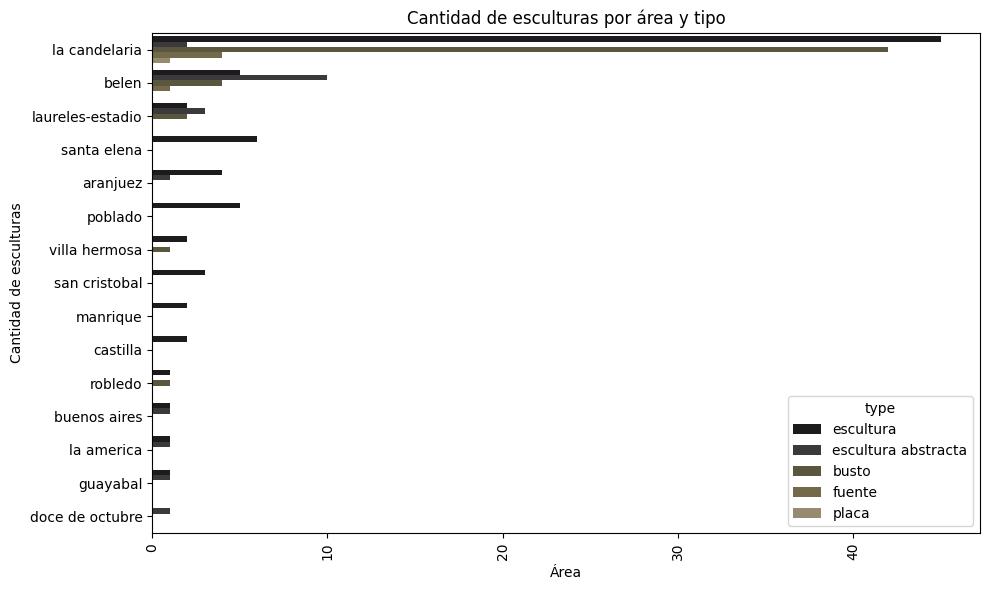

In [43]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='area', hue='type' ,order=df['area'].value_counts().index, palette=colors)
plt.title('Cantidad de esculturas por área y tipo')
plt.xlabel('Área')
plt.ylabel('Cantidad de esculturas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [44]:
df.head()

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
0,3,manrique,carlos gardel,carrera 45 con calle 73,escultura,1968,alfonso goez,6.269014,-75.554733
1,3,manrique,jorge eliecer gaitan ayala,carrera 37 con calle 69,escultura,2004,rodolfo montoya,6.265313,-75.548335
2,4,aranjuez,talentos en libertad,carrera 48 con calle 93,escultura,2003,luz maria piedrahita,6.285199,-75.556308
3,4,aranjuez,antonio nariño,carrera 50 con calle 90,escultura,1962,alfonso goez,6.282458,-75.561160
4,4,aranjuez,cristo,carrera 50 con calle 90,escultura,1983,josue giraldo,6.282358,-75.561155


## Preguntas

### Preguntas relacionadas con la distribución geográfica y temporal

#### Distribución geográfica de las esculturas:

¿Cómo se distribuyen las esculturas por áreas en Medellín?

In [45]:
a1 = df.groupby('area').agg({'area': 'count'}).rename(columns={'area': 'cantidad-esculturas'}).sort_values(by='cantidad-esculturas', ascending=False).reset_index()
a1['porcentaje-esculturas'] = (a1['cantidad-esculturas'] / a1['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a1

,area,cantidad-esculturas,porcentaje-esculturas
0,la candelaria,94,60.3%
1,belen,20,12.8%
2,laureles-estadio,7,4.5%
3,santa elena,6,3.8%
4,aranjuez,5,3.2%
5,poblado,5,3.2%
6,san cristobal,3,1.9%
7,villa hermosa,3,1.9%
8,buenos aires,2,1.3%
9,castilla,2,1.3%


¿Cuáles son las áreas con mayor y menor cantidad de esculturas?

* La comuna La Candelaria que abarca el centro de la ciudad de Medellín es donde se encuentra el **61.8%** de las esculturas de Medellín. 
* La comuna 12 de Octubre es la que cuenta con la menor cantidad de esculturas en la ciudad, con tan solo 1 escultura que represnta el **0.6%%**

¿Existen concentraciones significativas de esculturas en ciertas zonas de la ciudad?

In [46]:
# Crear un objeto de mapa centrado en la ubicación promedio
map_center = [6.23,-75.57]
heat_map = folium.Map(location=map_center, zoom_start=13)

# Preparar los datos para el mapa de calor
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]

# Añadir el mapa de calor
HeatMap(heat_data).add_to(heat_map)

# Guardar el mapa en un archivo HTML
heat_map.save('../reports/maps/heatmap.html')

# Mostrar el mapa
heat_map

#### Distribución temporal de las esculturas

¿Cómo ha evolucionado el número de esculturas públicas a lo largo del tiempo?

In [47]:
a2 = df.groupby('year').agg({'year': 'count'}).rename(columns={'year': 'cantidad-esculturas'}).sort_values(by='year', ascending=True).reset_index()
a2

,year,cantidad-esculturas
0,1853,1
1,1893,1
2,1902,1
3,1910,1
4,1917,1
5,1920,1
6,1922,1
7,1923,2
8,1925,1
9,1930,1


¿En qué década se instalaron más esculturas?

En la decade de 1990 se instalaron más esculturas

I Festival Internacional de Arte Ciudad de Medellín en el año de 1997.



### Preguntas relacionadas con los tipos de esculturas

#### Tipos de esculturas

¿Cuál es la distribución de los diferentes tipos de esculturas (escultura, busto, escultura abstracta, fuente, placa)?

¿Existen áreas que prefieren ciertos tipos de esculturas más que otros?

¿Hay alguna tendencia en la popularidad de los tipos de esculturas a lo largo del tiempo?

### Preguntas relacionadas con los autores

#### Autores de las esculturas

¿Quiénes son los autores más prolíficos de esculturas en Medellín?

¿Hay algún autor que tenga una concentración significativa de obras en ciertas áreas?

¿Se puede observar alguna evolución en el estilo o tipo de esculturas en función del autor?

### Preguntas relacionadas con la ubicación específica

#### Ubicación específica

¿Cómo se distribuyen las esculturas en términos de latitud y longitud?

¿Existen patrones en las ubicaciones específicas de las esculturas, como cercanía a parques, plazas, instituciones educativas, etc.?

### Preguntas adicionales de interés general

#### Relación entre características

¿Hay alguna correlación entre el año de instalación y el tipo de escultura?

¿Existen patrones en la relación entre el autor y el tipo de escultura?

#### Impacto de las esculturas

¿Cómo influyen las esculturas en la percepción de los diferentes barrios de Medellín?

¿Existe alguna relación entre la cantidad o tipo de esculturas y el turismo en ciertas áreas?

## Plantear preguntas interesantes a resolver con el analisis

### Preguntas relacionadas con la distribución geográfica y temporal:
1. Distribución geográfica de las esculturas:
> * ¿Cómo se distribuyen las esculturas por áreas en Medellín?
> * ¿Cuáles son las áreas con mayor y menor cantidad de esculturas?
> * ¿Existen concentraciones significativas de esculturas en ciertas zonas de la ciudad?

2. Distribución temporal de las esculturas:
> * ¿Cómo ha evolucionado el número de esculturas públicas a lo largo del tiempo?
> * ¿Hay alguna tendencia en la instalación de esculturas en ciertos períodos históricos?
> * ¿En qué década se instalaron más esculturas?

### Preguntas relacionadas con los tipos de esculturas:
3. Tipos de esculturas:
> * ¿Cuál es la distribución de los diferentes tipos de esculturas (escultura, busto, escultura abstracta, fuente, placa)?
> * ¿Existen áreas que prefieren ciertos tipos de esculturas más que otros?
> * ¿Hay alguna tendencia en la popularidad de los tipos de esculturas a lo largo del tiempo?

### Preguntas relacionadas con los autores:
4. Autores de las esculturas:
> * ¿Quiénes son los autores más prolíficos de esculturas en Medellín?
> * ¿Hay algún autor que tenga una concentración significativa de obras en ciertas áreas?
> * ¿Se puede observar alguna evolución en el estilo o tipo de esculturas en función del autor?

### Preguntas relacionadas con la ubicación específica:
5. Ubicación específica:
> * ¿Cómo se distribuyen las esculturas en términos de latitud y longitud?
> * ¿Existen patrones en las ubicaciones específicas de las esculturas, como cercanía a parques, plazas, instituciones educativas, etc.?

### Preguntas adicionales de interés general:
6. Relación entre características:
> * ¿Hay alguna correlación entre el año de instalación y el tipo de escultura?
> * ¿Existen patrones en la relación entre el autor y el tipo de escultura?

7. Impacto de las esculturas:
>* ¿Cómo influyen las esculturas en la percepción de los diferentes barrios de Medellín?
>* ¿Existe alguna relación entre la cantidad o tipo de esculturas y el turismo en ciertas áreas?